In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy

In [3]:
df = pd.read_csv("04_cea_4.csv")
# df = pd.read_csv("04_cea_new1.csv") # For single feature values
# df = pd.read_csv("04_cea_new2.csv") # For multiple feature values
df

,﻿eyes,nose,head,Fcolor,hair,smile
0,round,triangle,round,purple,yes,yes
1,square,square,square,green,yes,no
2,square,triangle,round,yellow,yes,yes
3,round,triangle,round,green,no,no
4,square,square,round,yellow,yes,yes


In [4]:
possible_prop = {}
for i in range(len(df.columns)):
    possible_prop[df.columns[i]] = list(set(df[df.columns[i]]))
print(possible_prop,"\n")
positive_ex = input("Enter positive example label: ")
negative_ex = input("Enter negative example label: ")
#positive_ex = possible_prop[df.iloc[:,-1:].columns[0]][1]
#negative_ex = possible_prop[df.iloc[:,-1:].columns[0]][0]
print("Positive example:",positive_ex,"\nNegative example:",negative_ex)
# by default it takes the first value in last column label as positive example
# the other one is taken as negative example

{'\ufeffeyes': ['round', 'square'], 'nose': ['triangle', 'square'], 'head': ['round', 'square'], 'Fcolor': ['green', 'yellow', 'purple'], 'hair': ['yes', 'no'], 'smile': ['yes', 'no']} 

Enter positive example label: yes
Enter negative example label: no
Positive example: yes 
Negative example: no


### Algorithm reference image
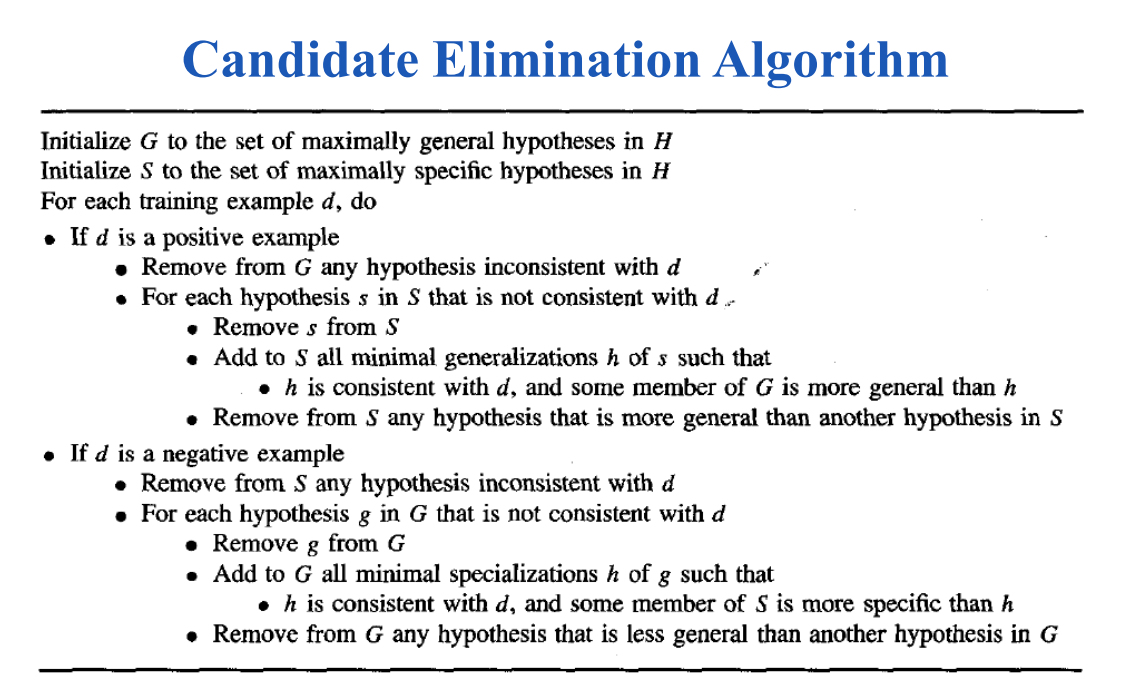

In [5]:
def ind_to_val(index):
    return possible_prop[df.columns[index]]
# ind_to_val(3)

def check_consistency(each_hyp,inp):
    for i in range(len(each_hyp)):
        if inp[i] == "?" or each_hyp[i]=="?":
            continue
        if inp[i] != each_hyp[i]:
            return False
    return True

def check_consistency_for_S(s,each_g):
    for i in range(len(each_g)):
        if each_g[i]!="?" and s[i]!="?" and each_g[i]!=s[i]:
            return False
        if each_g[i] == "?":
            continue
        if s[i]=="?" or s[i] != each_g[i]:
            return False
    return True

# Assuming only 2 possible states for the given example
def other_val(hlist,val):
    index = hlist.index(val)
    if index:
        return hlist[0]
    else:
        return hlist[1]

def put_other_vals(hlist,val):
    index = hlist.index(val)
    return hlist[:index]+hlist[index+1:]
    

In [6]:
G = [["?"]*(len(df.columns)-1)]
S = ["$"]*(len(df.columns)-1)
print(f"Initial S: {S}\nInitial G: {G}\n")
for index, row in df.iterrows():
    print(f"Input : {list(row)}")
    print(f"Example Number : {index+1} ",end=": ")
    if row[-1]==positive_ex:
        print("Positive Example")
        # first apply input on G
        for each_hyp in G:
            for val in range(len(df.columns)-1):
                    if each_hyp[val] == "?" or each_hyp[val] == row[val]:
                        continue
                    else: # each_val != val
                        G.remove(each_hyp)
        #  then apply input on S 
        for val in range(len(df.columns)-1):
            if S[val] == "$":
                S[val] = row[val]
            elif S[val] == row[val]:
                continue
            else: # when S[val] != row[val]
                S[val] = "?"
        #  then check for consistency with S
        for each_hyp in G:
            if not check_consistency(each_hyp,S):
                G.remove(each_hyp)
#         for val in range(len(df.columns)-1):
#             for each_hyp in G:
#                 if each_hyp[val] == "?":
#                     continue
#                 elif each_hyp[val] != S[val]:
#                     G.remove(each_hyp)
    else:
        print("Negative Example")
        # first apply input on S
        if not check_consistency_for_S(S,row):
            for val in range(len(df.columns)-1):
                if S[val] == "$":
                    S[val] = other_val(ind_to_val(val),row[val])
#                 if row[val] == S[val]:
#                     continue
                else: # not equal case
                    continue
        #  then make G minimally specific
        to_remove = []
        leng = len(G)
        for each_hyp_ind in range(leng):
            if "?" in G[each_hyp_ind]:
                for val in range(len(df.columns)-1):
                    if G[each_hyp_ind][val] == "?":
#                         print(f"other vals: {put_other_vals(ind_to_val(val),row[val])}")
                        other_features = put_other_vals(ind_to_val(val),row[val])
                        if len(other_features) == 0:
                            temp = deepcopy(G[each_hyp_ind])
                            temp[val] = "$"
                            G.append(temp)
                        else:
                            for feat_ind in range(len(other_features)):
#                                 print(other_features[feat_ind])
#                                 temp[val] = other_val(ind_to_val(val),row[val])
                                temp = deepcopy(G[each_hyp_ind]) # for memory referencing
                                temp[val] = other_features[feat_ind]
                                G.append(temp)
                to_remove.append(G[each_hyp_ind])
#         print(G)
        for i in to_remove:
            G.remove(i)
        print(f"G before checking for consistency{G}\n")
        # check for consistency with S for every G
        to_remove_G = []
        for i in range(len(G)):
                if not check_consistency_for_S(S,G[i]):
                    to_remove_G.append(G[i])
        for i in to_remove_G:
            G.remove(i)
    print(f"G{index+1} = {G}\nS{index+1} = {S}\n\n")

Initial S: ['$', '$', '$', '$', '$']
Initial G: [['?', '?', '?', '?', '?']]

Input : ['round', 'triangle', 'round', 'purple', 'yes', 'yes']
Example Number : 1 : Positive Example
G1 = [['?', '?', '?', '?', '?']]
S1 = ['round', 'triangle', 'round', 'purple', 'yes']


Input : ['square', 'square', 'square', 'green', 'yes', 'no']
Example Number : 2 : Negative Example
G before checking for consistency[['round', '?', '?', '?', '?'], ['?', 'triangle', '?', '?', '?'], ['?', '?', 'round', '?', '?'], ['?', '?', '?', 'yellow', '?'], ['?', '?', '?', 'purple', '?'], ['?', '?', '?', '?', 'no']]

G2 = [['round', '?', '?', '?', '?'], ['?', 'triangle', '?', '?', '?'], ['?', '?', 'round', '?', '?'], ['?', '?', '?', 'purple', '?']]
S2 = ['round', 'triangle', 'round', 'purple', 'yes']


Input : ['square', 'triangle', 'round', 'yellow', 'yes', 'yes']
Example Number : 3 : Positive Example
G3 = [['?', 'triangle', '?', '?', '?'], ['?', '?', 'round', '?', '?']]
S3 = ['?', 'triangle', 'round', '?', 'yes']


Inpu